In [2]:
import pandas as pd
#Reading in our data
df = pd.read_csv("C:\\Users\\Faith\\Downloads\\Grades_Prediction.csv")
df.head(5)

,StudentID,Gender,Study_Hours,Attendance,Internet_Access,Test_Prep_Hours,Extracurriculars,Prev_Midterm_Grade,Prev_Final_Grade,Midterm_Grade,Final_Grade
0,STU112,M,21.0,88,Y,5.0,N,B,B,B,B
1,STU119,M,14.0,78,Y,6.0,N,B,C,B,C
2,STU138,M,18.0,80,Y,NaN,N,C,C,C,C
3,STU154,F,16.0,70,Y,5.0,N,C,C,C,C
4,STU173,M,22.0,90,Y,5.0,NaN,B,C,A,B


In [3]:
#Preview shape of dataset
df.shape

(65, 11)

In [4]:
df.sample(n=3)

,StudentID,Gender,Study_Hours,Attendance,Internet_Access,Test_Prep_Hours,Extracurriculars,Prev_Midterm_Grade,Prev_Final_Grade,Midterm_Grade,Final_Grade
21,STU488,F,25.0,95,N,9.0,N,C,C,C,C
62,STU934,M,18.0,80,Y,5.0,NaN,C,C,C,C
31,STU587,M,16.0,80,Y,5.0,Y,D,D,D,D


# Exploratory Data Analysis(EDA)

In [5]:
#Summary Statistics
df.describe()

,Study_Hours,Attendance,Test_Prep_Hours
count,57.000000,65.000000,56.000000
mean,18.842105,83.307692,6.017857
std,3.692606,7.262754,1.882852
min,12.000000,70.000000,3.000000
25%,16.000000,78.000000,4.750000
50%,18.000000,82.000000,6.000000
75%,22.000000,88.000000,8.000000
max,26.000000,97.000000,9.000000


In [6]:
#Check the data type
df.dtypes

StudentID              object
Gender                 object
Study_Hours           float64
Attendance              int64
Internet_Access        object
Test_Prep_Hours       float64
Extracurriculars       object
Prev_Midterm_Grade     object
Prev_Final_Grade       object
Midterm_Grade          object
Final_Grade            object
dtype: object

# Data Cleaning

In [8]:
#Checking for duplicate records
df.duplicated().sum()

3

3 records have been marked as duplicated, therefore we simply drop them.

In [9]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(62, 11)

In [12]:
#Checking for missing values in the dataset
df.isnull().sum()

StudentID             0
Gender                0
Study_Hours           7
Attendance            0
Internet_Access       7
Test_Prep_Hours       9
Extracurriculars      5
Prev_Midterm_Grade    0
Prev_Final_Grade      6
Midterm_Grade         0
Final_Grade           0
dtype: int64

In [13]:
# check if there are any patterns in the missing values
df[df.isnull().any(axis=1)]

,StudentID,Gender,Study_Hours,Attendance,Internet_Access,Test_Prep_Hours,Extracurriculars,Prev_Midterm_Grade,Prev_Final_Grade,Midterm_Grade,Final_Grade
2,STU138,M,18.0,80,Y,NaN,N,C,C,C,C
4,STU173,M,22.0,90,Y,5.0,NaN,B,C,A,B
8,STU267,M,15.0,78,NaN,4.0,N,C,D,C,C
11,STU345,F,18.0,80,N,NaN,N,D,D,D,D
12,STU362,M,23.0,92,Y,NaN,Y,D,D,C,C
18,STU436,F,21.0,88,Y,NaN,N,A,A,A,A
19,STU436,F,NaN,88,NaN,5.0,N,A,A,A,A
20,STU437,F,NaN,75,N,9.0,Y,C,NaN,C,C
25,STU517,F,NaN,85,Y,5.0,NaN,D,C,C,B
28,STU549,F,17.0,75,N,4.0,N,C,NaN,C,C


Replace missing values for Study_Hours with the column mean
Replace missing values for Test_Prep_Hours with the column median
Replace missing values for Prev_Final_Grade with the column mode
Replace missing values for Internet_Access and Extracurriculars with "N"

In [15]:
#Replacing values for Study hours with mean
df["Study_Hours"] = df["Study_Hours"].fillna(df["Study_Hours"].mean())

#Replacing missing values for Test prep Hours with median
df["Test_Prep_Hours"] = df["Test_Prep_Hours"].fillna(df["Test_Prep_Hours"].median())

#Replacing missing values for Prep Final Grade with mode
df["Prev_Final_Grade"] = df["Prev_Final_Grade"].fillna(df["Prev_Final_Grade"].mode().iloc[0])

#Replacing missing values for Internet Access and Extracurriculars with "N"
df["Internet_Access"] = df["Internet_Access"].fillna("N")
df["Extracurriculars"] = df["Extracurriculars"].fillna("N")

#Checking if all missing values have been replaced.
df.isnull().sum()

StudentID             0
Gender                0
Study_Hours           0
Attendance            0
Internet_Access       0
Test_Prep_Hours       0
Extracurriculars      0
Prev_Midterm_Grade    0
Prev_Final_Grade      0
Midterm_Grade         0
Final_Grade           0
dtype: int64

# Data Visualization

We will use Matplotlib library to create our visualizations.

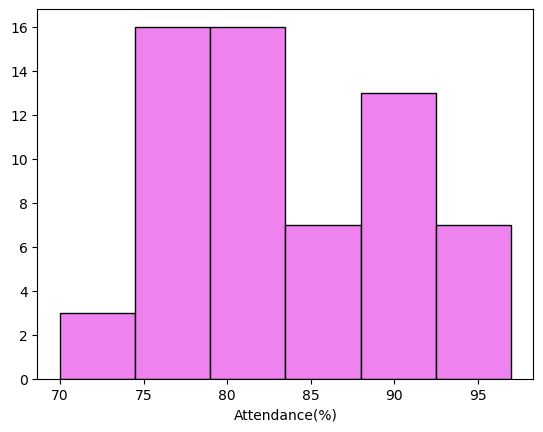

In [23]:
import matplotlib.pyplot as plt

#Create a histogram of attendance
plt.hist(df["Attendance"], bins = 6, edgecolor = "black", color = "violet")
#Set the label for the X-axis
plt.xlabel("Attendance(%)")

#Display the plot
plt.show()

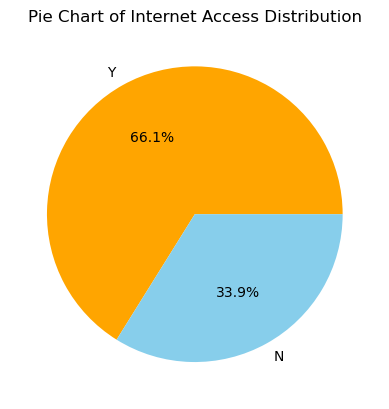

In [27]:
#Create a pie chart of internet access
counts = df['Internet_Access'].value_counts()
plt.pie(counts, labels=counts.index, colors=['orange', 'skyblue'], autopct='%1.1f%%')

# Set the title
plt.title('Pie Chart of Internet Access Distribution')

# Display the plot
plt.show()

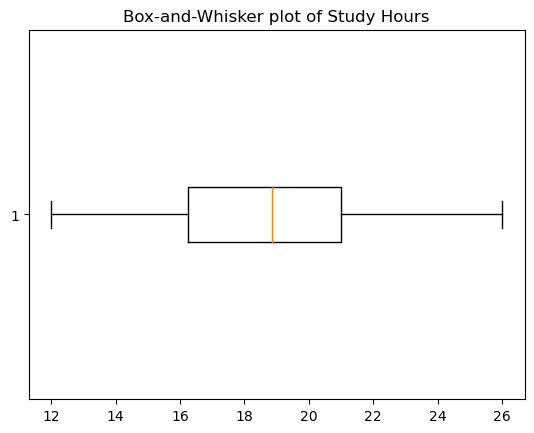

In [28]:
#Create a box-and-whisker plot of Study_Hours
plt.boxplot(df['Study_Hours'], vert=False)

#Add title
plt.title('Box-and-Whisker plot of Study Hours')

#Display the plot
plt.show()

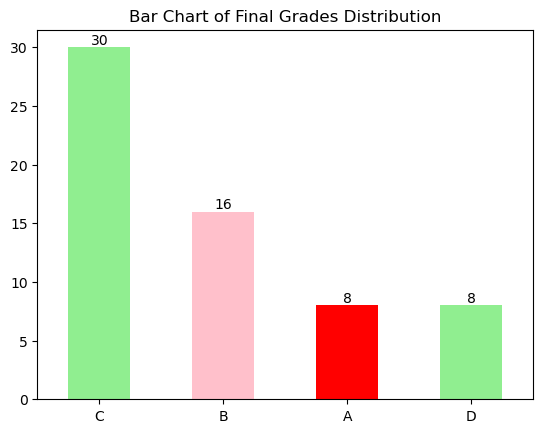

In [29]:
#Create a bar chart of Final_Grade
counts = df['Final_Grade'].value_counts()
colors = ['lightgreen', 'pink', 'red']
counts.plot(kind='bar', color=colors)

#Display number of each grade (optional)
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

#Rotate the x-axis tick labels
plt.xticks(rotation=0)

#Set title
plt.title('Bar Chart of Final Grades Distribution')

#Display the plot
plt.show()

# Data Modelling

We will apply manual encoding to Gender, one-hot encoding to Internet_Access and Extracurriculars, and label encoding to Prev_Midterm_Grade, Prev_Final_Grade, Midterm_Grade, and Final_Grade.
We will drop the StudentID column since it does not really benefit us and we will remove any new duplicated records that might be created as a result.

In [30]:
#Manually encode Gender column
df["Gender"] = df["Gender"].map({"F": 1, "M": 0})

#Confirm that then Gender column has been encoded
df["Gender"].value_counts()

0    33
1    29
Name: Gender, dtype: int64

In [35]:
#Import one-hot encoder
from sklearn.preprocessing import OneHotEncoder

#Create an instance of one hot encoder
encoder = OneHotEncoder(sparse = False)

#Fit and transform the Internet access and extracurriculars
df["Internet_Access"] = encoder.fit_transform(df[["Internet_Access"]])
df["Extracurriculars"] = encoder.fit_transform(df[["Extracurriculars"]])

#Preview the encoded variables
df[["Internet_Access", "Extracurriculars"]].head()

,Internet_Access,Extracurriculars
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [36]:
#Import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Prev_Midterm_Grade"] = le.fit_transform(df["Prev_Midterm_Grade"])
df["Prev_Final_Grade"] = le.fit_transform(df["Prev_Final_Grade"])
df["Midterm_Grade"] = le.fit_transform(df["Midterm_Grade"])
df["Final_Grade"] = le.fit_transform(df["Final_Grade"])

#Preview of the encorded variables
df[["Prev_Midterm_Grade", "Prev_Final_Grade", "Midterm_Grade", "Final_Grade"]].head()

,Prev_Midterm_Grade,Prev_Final_Grade,Midterm_Grade,Final_Grade
0,1,1,1,1
1,1,2,1,2
2,2,2,2,2
3,2,2,2,2
4,1,2,0,1


In [38]:
#Dropping the Student ID
df.drop("StudentID", axis = 1, inplace = True)

#Drop duplicates
df.drop_duplicates(inplace = True)

#Check dataset shape
df.shape

(60, 10)

In [39]:
df.dtypes

Gender                  int64
Study_Hours           float64
Attendance              int64
Internet_Access       float64
Test_Prep_Hours       float64
Extracurriculars      float64
Prev_Midterm_Grade      int32
Prev_Final_Grade        int32
Midterm_Grade           int32
Final_Grade             int32
dtype: object

Our dataset is now ready for modeling.

We will split our dataset into two: the training set (which is used to train the model) and the testing set (which is used to test the model to see whether it has learned well enough to be able to generalize onto unseen data). By convention, we split them 80-20, that is, 80% of the data becomes the training set and the remaining 20% becomes the test set, but this can change depending on your requirements.

In [41]:
from sklearn.model_selection import train_test_split

#Extracting our X and y
X = df.drop(columns=['Final_Grade'], axis=1)
y = df['Final_Grade']

#Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48, 9), (48,), (12, 9), (12,))

Applying classification algorithms

In [42]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

#Create an instance of LogisticRegression
logreg = LogisticRegression()

#Fit the logistic regression model
logreg.fit(X_train, y_train)

#Predict on the test set
y_pred = logreg.predict(X_test)

C:\Users\Faith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
#Confusion matrix and accuracy score
#Import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.75


Our model accuracy is at 75%.

In [48]:
#Using K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

#Train the classifier
knn.fit(X_train, y_train)

#Make predictions on the test
pred = knn.predict(X_test)

print(pred)

[1 0 1 0 2 0 2 2 2 2 2 2]


C:\Users\Faith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
